In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading Data File
titanic_data_file_path = 'train.csv'
titanic_data = pd.read_csv(titanic_data_file_path)
#titanic_data.columns

In [3]:
# Replace female with 0, male with 1
titanic_data['Sex'].replace(['female', 'male'],[0,1], inplace=True)
# Replace NaN Age with mean age
mean_age = np.nanmean(titanic_data.Age)
titanic_data.Age.replace([np.nan], [mean_age], inplace=True)
#titanic_data.Age = titanic_data.Age.apply(lambda a: mean_age if a.isna() == True else a)
# Set target 
y = titanic_data.Survived
# Set features
# Removed 'Sex', 'Cabin' columns, couldn't convert string to float
# Pclass = passenger class, SibSp = Number of Siblings/Spouses Aboard, Parch = Number of Parents/Children Aboard
feature_names = ['Age']
X = titanic_data[feature_names]

           Age
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
..         ...
886  27.000000
887  19.000000
888  29.699118
889  26.000000
890  32.000000

[891 rows x 1 columns]


In [4]:
data = pd.DataFrame()
data['x'] = titanic_data[feature_names]
data['y'] = titanic_data.Survived

In [5]:
data['x'].isna().sum()

0

In [6]:
print(data.x)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: x, Length: 891, dtype: float64


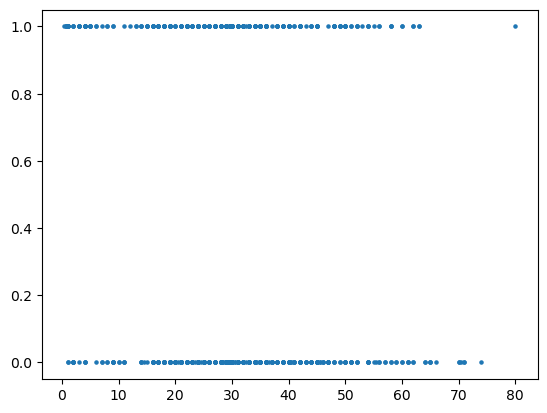

In [7]:
plt.scatter(data.x, data.y, s=5)

In [8]:
def calculate_gradient_log_likelihood(curr_betas, data):
    numerator = np.exp(curr_betas[0] + curr_betas[1]*data.x)
    p = numerator / (1+numerator)
    
    # Calculate partials
    partial_0 = np.sum(data.y - p)
    partial_1 = np.sum((data.y - p)*data.x)
    
    return np.array([partial_0, partial_1])

In [9]:
curr_betas = np.array([0.0, 0.0])
diff = np.inf
eta = 0.1

while diff > 0.01:
    grad = calculate_gradient_log_likelihood(curr_betas, data)
    diff = abs(grad).sum()
    curr_betas += eta*grad
    
print(curr_betas)

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


[-245.4326451   956.36658233]


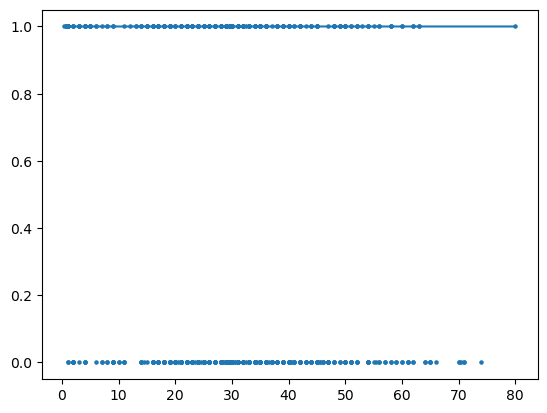

In [10]:
plt.scatter(data.x, data.y, s=5)

x_vals = np.arange(data.x.min(), data.x.max(), .01)
p_vals = 1 / (1+ np.exp(-(curr_betas[0] + curr_betas[1]*x_vals)))
plt.plot(x_vals, p_vals)

In [11]:
clf = LogisticRegression(penalty='none')
clf.fit(np.array(data.x).reshape(-1,1), data.y)
print('beta_0: %s'%clf.intercept_[0])
print('beta_1: %s'%clf.coef_[0][0])

beta_0: -0.14326513159754847
beta_1: -0.011197452869045787


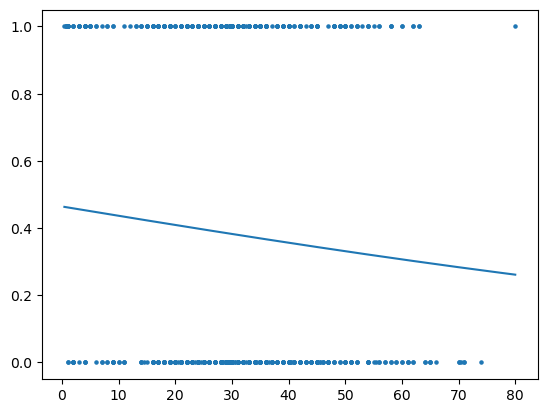

In [12]:
plt.scatter(data.x, data.y, s=5)

x_vals = np.arange(data.x.min(), data.x.max(), .01)
p_vals = 1 / (1 + np.exp(-(clf.intercept_[0] + clf.coef_[0][0]*x_vals)))
plt.plot(x_vals, p_vals)